In [1]:
# Aref HW7
# Dependencies - load them all up cowboy never know watcha gonna need... yeehaw lol
import json
import tweepy
import time
import random
import requests as req
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# end yeehaw block


In [2]:
## News Mood

#In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity 
#of various news outlets, and to present your findings visually.

#Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out 
#by the following news organizations: **BBC, CBS, CNN, Fox, and New York times**.

#![output_10_0.png](Images/output_10_0.png)

#![output_13_1.png](Images/output_13_1.png)

#The first plot will be and/or feature the following:

#* Be a scatter plot of sentiments of the last **100** tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
#* Each plot point will reflect the _compound_ sentiment of a tweet.
#* Sort each plot point by its relative timestamp.

#The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

#The tools of the trade you will need for your task as a data analyst include the following: 
#   tweepy, pandas, matplotlib, and VADER.

#Your final Jupyter notebook must:

#* Pull last 100 tweets from each outlet.
#* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
#* Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
#* Export the data in the DataFrame into a CSV file.
#* Save PNG images for each plot.

#As final considerations:

#* You must complete your analysis using a Jupyter notebook.
#* You must use the Matplotlib or Pandas plotting libraries.
#* Include a written description of three observable trends based on the data.
#* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.

In [3]:
# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [5]:
# Target Search Term
target_terms = ("@BBC", "@CBS", "@CNN", "@nytimes","@FoxNews")
results_list =[]

for target in target_terms:

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweet_list = []
    tweet_time = []


    # Retrieve 100 tweets from each outfit           
    public_tweets = api.search(target, count=120, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        raw_time = tweet["created_at"]

        # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        tweet_time.append(raw_time)

                
        # Set the new oldest_tweet value
        oldest_tweet = tweet["id"] - 1

        
        
        
    # Store the Average Sentiments --- i asked Dartagnan for the second plot and ther Avg Compound is for that - the overall sentiment
    sentiment = {
        "User": target,
        "Compound": compound_list,
        "Avg Compound": np.mean(compound_list),
        "Positive": positive_list,
        "Neutral": negative_list,
        "Negative": neutral_list,
        "Tweet Count": len(compound_list),
        "Tweet Time": tweet_time,
    }

    # Print the Sentiments
    #print(sentiment)
   # print()
    
    # Append news org results to 'results_list'
    results_list.append(sentiment)
    
    sentiments_pd = pd.DataFrame.from_dict(results_list).set_index("User")
    sentiments_pd

combo_df=pd.DataFrame(results_list)
   

    
    


In [6]:
#write dataframe to CSV file
combo_df.to_csv('aref-hw7-out.csv', sep=',')
#Checkout the datafram so cool... aahhhhh .... ooohh..... yeeehaaaa....
combo_df


,Avg Compound,Compound,Negative,Neutral,Positive,Tweet Count,Tweet Time,User
0,0.101504,"[0.8331, 0.0, 0.0, 0.0, 0.4215, 0.0, -0.5574, ...","[0.657, 1.0, 1.0, 1.0, 0.872, 0.864, 0.859, 1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.068, 0.141, 0.0, 0...","[0.343, 0.0, 0.0, 0.0, 0.128, 0.068, 0.0, 0.0,...",100,"[Sat Jul 14 17:30:48 +0000 2018, Sat Jul 14 17...",@BBC
1,0.053271,"[0.2244, 0.0, 0.0, 0.4926, -0.296, 0.0772, 0.0...","[0.806, 1.0, 1.0, 0.856, 0.804, 0.944, 1.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.196, 0.0, 0.0, 0.0, 0.0...","[0.194, 0.0, 0.0, 0.144, 0.0, 0.056, 0.0, 0.12...",100,"[Sat Jul 14 17:30:37 +0000 2018, Sat Jul 14 17...",@CBS
2,0.026508,"[0.8561, 0.0, 0.0, 0.0, -0.5423, 0.0, 0.4404, ...","[0.693, 1.0, 1.0, 1.0, 0.811, 1.0, 0.884, 0.73...","[0.0, 0.0, 0.0, 0.0, 0.189, 0.0, 0.0, 0.142, 0...","[0.307, 0.0, 0.0, 0.0, 0.0, 0.0, 0.116, 0.123,...",100,"[Sat Jul 14 17:30:54 +0000 2018, Sat Jul 14 17...",@CNN
3,0.057923,"[0.0, 0.0, 0.8331, 0.0, 0.0, 0.3612, 0.0772, 0...","[0.797, 1.0, 0.657, 1.0, 1.0, 0.783, 0.817, 1....","[0.101, 0.0, 0.0, 0.0, 0.0, 0.0, 0.086, 0.0, 0...","[0.101, 0.0, 0.343, 0.0, 0.0, 0.217, 0.097, 0....",100,"[Sat Jul 14 17:30:52 +0000 2018, Sat Jul 14 17...",@nytimes
4,0.066704,"[0.627, -0.7163, 0.7845, 0.0, 0.8561, 0.0, -0....","[0.759, 0.685, 0.685, 1.0, 0.693, 1.0, 0.866, ...","[0.0, 0.315, 0.0, 0.0, 0.0, 0.0, 0.134, 0.0, 0...","[0.241, 0.0, 0.315, 0.0, 0.307, 0.0, 0.0, 0.12...",100,"[Sat Jul 14 17:30:56 +0000 2018, Sat Jul 14 17...",@FoxNews


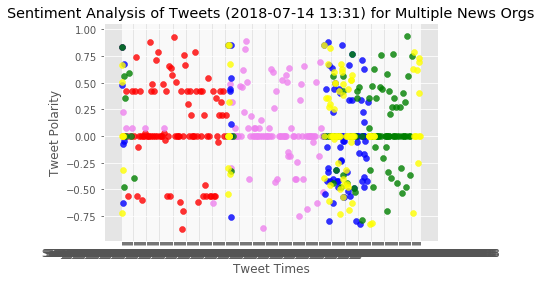

In [7]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, 
#vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, 
#data=None, **kwargs)[source]
    
colors = ["red", "violet", "blue", "green", "yellow"] 
z=0
    # Create plot
for User in combo_df["User"]:
    x_vals = combo_df["Tweet Time"].values.tolist()
    y_vals = combo_df["Compound"].values.tolist()
    plt.scatter(x_vals[z],y_vals[z], marker="o", linewidth=0.5, alpha=0.8, c=colors[z])
    
    z=z+1

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweet Times")
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for Multiple News Orgs")
plt.savefig('aref-hw7-plot1.png')

plt.show()
    

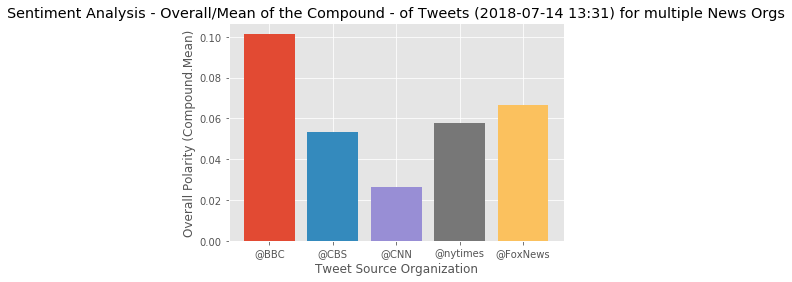

In [8]:
#The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

colors = ["red", "white", "blue", "green", "yellow"] 
z=0
    # Create plot
for User in combo_df["User"]:
    x_vals = combo_df["User"].values.tolist()
    y_vals = combo_df["Avg Compound"].values.tolist()
    plt.bar(x_vals[z],y_vals[z])
    z=z+1



plt.ylabel("Overall Polarity (Compound.Mean)")
plt.xlabel("Tweet Source Organization")
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis - Overall/Mean of the Compound - of Tweets ({now}) for multiple News Orgs")
plt.savefig('aref-hw7-plot2.png')
plt.show()


